<a href="https://colab.research.google.com/github/anologicon/jat-rail-time-series/blob/master/JatRailTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/JetRail/train.csv");
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/JetRail/test.csv");

train_original = train.copy()
test_original = train.copy()

In [7]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [0]:
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')

In [0]:
# sometimes python scare me
for i in (train, test, test_original, train_original):
  i['year'] = i.Datetime.dt.year
  i['month'] = i.Datetime.dt.month
  i['day'] = i.Datetime.dt.day
  i['hour'] = i.Datetime.dt.hour

In [0]:
train['dayOfWeek'] = train.Datetime.dt.dayofweek
temp = train.Datetime

In [0]:
temp2 = train.Datetime.apply(lambda x:1 if(x.dayofweek == 5 or x.dayofweek == 6) else 0)
train['weekend'] = temp2

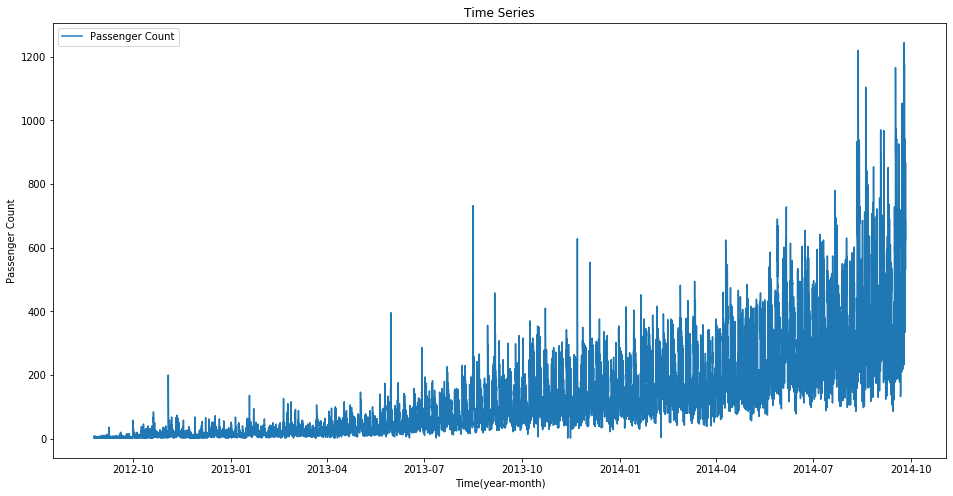

In [12]:
train.set_index('Datetime', inplace=True)

df = train.drop('ID', 1)

ts = df.Count

plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc='best')

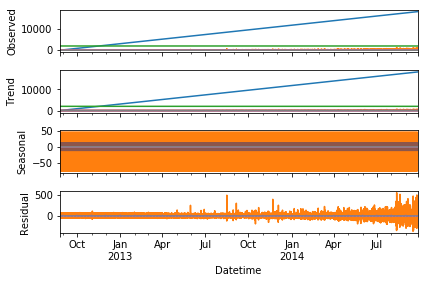

In [25]:
result = seasonal_decompose(train)

result.plot()
plt.show()

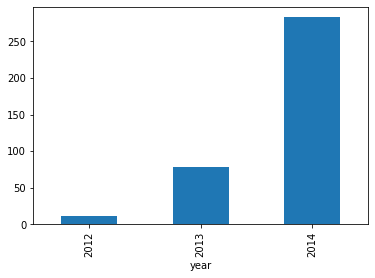

In [13]:
# Hypothesis - Traffic will increase as the yars pass by

train.groupby('year')['Count'].mean().plot.bar()

# That's a true hypothesis

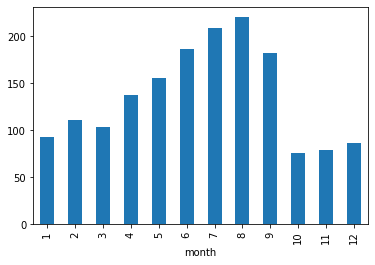

In [26]:
# Hypothesis - Increase in traffic from May to October

train.groupby('month')['Count'].mean().plot.bar()